<a href="https://colab.research.google.com/github/westonjackson/wordle_solver/blob/main/Wordle_Solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Corpus

In [4]:
from nltk import FreqDist
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [6]:
targetlist = {
    "cigar",
    "rebut",
    "sissy",
    "humph",
    "awake",
    "blush",
    "focal",
    "evade",
    "naval",
    "serve",
    "heath",
    "dwarf",
    "model",
    "karma",
    "stink",
    "grade",
    "quiet",
    "bench",
    "abate",
    "feign",
    "major",
    "death",
    "fresh",
    "crust",
    "stool",
    "colon",
    "abase",
    "marry",
    "react",
    "batty",
    "pride",
    "floss",
    "helix",
    "croak",
    "staff",
    "paper",
    "unfed",
    "whelp",
    "trawl",
    "outdo",
    "adobe",
    "crazy",
    "sower",
    "repay",
    "digit",
    "crate",
    "cluck",
    "spike",
    "mimic",
    "pound",
    "maxim",
    "linen",
    "unmet",
    "flesh",
    "booby",
    "forth",
    "first",
    "stand",
    "belly",
    "ivory",
    "seedy",
    "print",
    "yearn",
    "drain",
    "bribe",
    "stout",
    "panel",
    "crass",
    "flume",
    "offal",
    "agree",
    "error",
    "swirl",
    "argue",
    "bleed",
    "delta",
    "flick",
    "totem",
    "wooer",
    "front",
    "shrub",
    "parry",
    "biome",
    "lapel",
    "start",
    "greet",
    "goner",
    "golem",
    "lusty",
    "loopy",
    "round",
    "audit",
    "lying",
    "gamma",
    "labor",
    "islet",
    "civic",
    "forge",
    "corny",
    "moult",
    "basic",
    "salad",
    "agate",
    "spicy",
    "spray",
    "essay",
    "fjord",
    "spend",
    "kebab",
    "guild",
    "aback",
    "motor",
    "alone",
    "hatch",
    "hyper",
    "thumb",
    "dowry",
    "ought",
    "belch",
    "dutch",
    "pilot",
    "tweed",
    "comet",
    "jaunt",
    "enema",
    "steed",
    "abyss",
    "growl",
    "fling",
    "dozen",
    "boozy",
    "erode",
    "world",
    "gouge",
    "click",
    "briar",
    "great",
    "altar",
    "pulpy",
    "blurt",
    "coast",
    "duchy",
    "groin",
    "fixer",
    "group",
    "rogue",
    "badly",
    "smart",
    "pithy",
    "gaudy",
    "chill",
    "heron",
    "vodka",
    "finer",
    "surer",
    "radio",
    "rouge",
    "perch",
    "retch",
    "wrote",
    "clock",
    "tilde",
    "store",
    "prove",
    "bring",
    "solve",
    "cheat",
    "grime",
    "exult",
    "usher",
    "epoch",
    "triad",
    "break",
    "rhino",
    "viral",
    "conic",
    "masse",
    "sonic",
    "vital",
    "trace",
    "using",
    "peach",
    "champ",
    "baton",
    "brake",
    "pluck",
    "craze",
    "gripe",
    "weary",
    "picky",
    "acute",
    "ferry",
    "aside",
    "tapir",
    "troll",
    "unify",
    "rebus",
    "boost",
    "truss",
    "siege",
    "tiger",
    "banal",
    "slump",
    "crank",
    "gorge",
    "query",
    "drink",
    "favor",
    "abbey",
    "tangy",
    "panic",
    "solar",
    "shire",
    "proxy",
    "point",
    "robot",
    "prick",
    "wince",
    "crimp",
    "knoll",
    "sugar",
    "whack",
    "mount",
    "perky",
    "could",
    "wrung",
    "light",
    "those",
    "moist",
    "shard",
    "pleat",
    "aloft",
    "skill",
    "elder",
    "frame",
    "humor",
    "pause",
    "ulcer",
    "ultra",
    "robin",
    "cynic",
    "agora",
    "aroma",
    "caulk",
    "shake",
    "pupal",
    "dodge",
    "swill",
    "tacit",
    "other",
    "thorn",
    "trove",
    "bloke",
    "vivid",
    "spill",
    "chant",
    "choke",
    "rupee",
    "nasty",
    "mourn",
    "ahead",
    "brine",
    "cloth",
    "hoard",
    "sweet",
    "month",
    "lapse",
    "watch",
    "today",
    "focus",
    "smelt",
    "tease",
    "cater",
    "movie",
    "lynch",
    "saute",
    "allow",
    "renew",
    "their",
    "slosh",
    "purge",
    "chest",
    "depot",
    "epoxy",
    "nymph",
    "found",
    "shall",
    "harry",
    "stove",
    "lowly",
    "snout",
    "trope",
    "fewer",
    "shawl",
    "natal",
    "fibre",
    "comma",
    "foray",
    "scare",
    "stair",
    "black",
    "squad",
    "royal",
    "chunk",
    "mince",
    "slave",
    "shame",
    "cheek",
    "ample",
    "flair",
    "foyer",
    "cargo",
    "oxide",
    "plant",
    "olive",
    "inert",
    "askew",
    "heist",
    "shown",
    "zesty",
    "hasty",
    "trash",
    "fella",
    "larva",
    "forgo",
    "story",
    "hairy",
    "train",
    "homer",
    "badge",
    "midst",
    "canny",
    "fetus",
    "butch",
    "farce",
    "slung",
    "tipsy",
    "metal",
    "yield",
    "delve",
    "being",
    "scour",
    "glass",
    "gamer",
    "scrap",
    "money",
    "hinge",
    "album",
    "vouch",
    "asset",
    "tiara",
    "crept",
    "bayou",
    "atoll",
    "manor",
    "creak",
    "showy",
    "phase",
    "froth",
    "depth",
    "gloom",
    "flood",
    "trait",
    "girth",
    "piety",
    "payer",
    "goose",
    "float",
    "donor",
    "atone",
    "primo",
    "apron",
    "blown",
    "cacao",
    "loser",
    "input",
    "gloat",
    "awful",
    "brink",
    "smite",
    "beady",
    "rusty",
    "retro",
    "droll",
    "gawky",
    "hutch",
    "pinto",
    "gaily",
    "egret",
    "lilac",
    "sever",
    "field",
    "fluff",
    "hydro",
    "flack",
    "agape",
    "wench",
    "voice",
    "stead",
    "stalk",
    "berth",
    "madam",
    "night",
    "bland",
    "liver",
    "wedge",
    "augur",
    "roomy",
    "wacky",
    "flock",
    "angry",
    "bobby",
    "trite",
    "aphid",
    "tryst",
    "midge",
    "power",
    "elope",
    "cinch",
    "motto",
    "stomp",
    "upset",
    "bluff",
    "cramp",
    "quart",
    "coyly",
    "youth",
    "rhyme",
    "buggy",
    "alien",
    "smear",
    "unfit",
    "patty",
    "cling",
    "glean",
    "label",
    "hunky",
    "khaki",
    "poker",
    "gruel",
    "twice",
    "twang",
    "shrug",
    "treat",
    "unlit",
    "waste",
    "merit",
    "woven",
    "octal",
    "needy",
    "clown",
    "widow",
    "irony",
    "ruder",
    "gauze",
    "chief",
    "onset",
    "prize",
    "fungi",
    "charm",
    "gully",
    "inter",
    "whoop",
    "taunt",
    "leery",
    "class",
    "theme",
    "lofty",
    "tibia",
    "booze",
    "alpha",
    "thyme",
    "eclat",
    "doubt",
    "parer",
    "chute",
    "stick",
    "trice",
    "alike",
    "sooth",
    "recap",
    "saint",
    "liege",
    "glory",
    "grate",
    "admit",
    "brisk",
    "soggy",
    "usurp",
    "scald",
    "scorn",
    "leave",
    "twine",
    "sting",
    "bough",
    "marsh",
    "sloth",
    "dandy",
    "vigor",
    "howdy",
    "enjoy",
    "valid",
    "ionic",
    "equal",
    "unset",
    "floor",
    "catch",
    "spade",
    "stein",
    "exist",
    "quirk",
    "denim",
    "grove",
    "spiel",
    "mummy",
    "fault",
    "foggy",
    "flout",
    "carry",
    "sneak",
    "libel",
    "waltz",
    "aptly",
    "piney",
    "inept",
    "aloud",
    "photo",
    "dream",
    "stale",
    "vomit",
    "ombre",
    "fanny",
    "unite",
    "snarl",
    "baker",
    "there",
    "glyph",
    "pooch",
    "hippy",
    "spell",
    "folly",
    "louse",
    "gulch",
    "vault",
    "godly",
    "threw",
    "fleet",
    "grave",
    "inane",
    "shock",
    "crave",
    "spite",
    "valve",
    "skimp",
    "claim",
    "rainy",
    "musty",
    "pique",
    "daddy",
    "quasi",
    "arise",
    "aging",
    "valet",
    "opium",
    "avert",
    "stuck",
    "recut",
    "mulch",
    "genre",
    "plume",
    "rifle",
    "count",
    "incur",
    "total",
    "wrest",
    "mocha",
    "deter",
    "study",
    "lover",
    "safer",
    "rivet",
    "funny",
    "smoke",
    "mound",
    "undue",
    "sedan",
    "pagan",
    "swine",
    "guile",
    "gusty",
    "equip",
    "tough",
    "canoe",
    "chaos",
    "covet",
    "human",
    "udder",
    "lunch",
    "blast",
    "stray",
    "manga",
    "melee",
    "lefty",
    "quick",
    "paste",
    "given",
    "octet",
    "risen",
    "groan",
    "leaky",
    "grind",
    "carve",
    "loose",
    "sadly",
    "spilt",
    "apple",
    "slack",
    "honey",
    "final",
    "sheen",
    "eerie",
    "minty",
    "slick",
    "derby",
    "wharf",
    "spelt",
    "coach",
    "erupt",
    "singe",
    "price",
    "spawn",
    "fairy",
    "jiffy",
    "filmy",
    "stack",
    "chose",
    "sleep",
    "ardor",
    "nanny",
    "niece",
    "woozy",
    "handy",
    "grace",
    "ditto",
    "stank",
    "cream",
    "usual",
    "diode",
    "valor",
    "angle",
    "ninja",
    "muddy",
    "chase",
    "reply",
    "prone",
    "spoil",
    "heart",
    "shade",
    "diner",
    "arson",
    "onion",
    "sleet",
    "dowel",
    "couch",
    "palsy",
    "bowel",
    "smile",
    "evoke",
    "creek",
    "lance",
    "eagle",
    "idiot",
    "siren",
    "built",
    "embed",
    "award",
    "dross",
    "annul",
    "goody",
    "frown",
    "patio",
    "laden",
    "humid",
    "elite",
    "lymph",
    "edify",
    "might",
    "reset",
    "visit",
    "gusto",
    "purse",
    "vapor",
    "crock",
    "write",
    "sunny",
    "loath",
    "chaff",
    "slide",
    "queer",
    "venom",
    "stamp",
    "sorry",
    "still",
    "acorn",
    "aping",
    "pushy",
    "tamer",
    "hater",
    "mania",
    "awoke",
    "brawn",
    "swift",
    "exile",
    "birch",
    "lucky",
    "freer",
    "risky",
    "ghost",
    "plier",
    "lunar",
    "winch",
    "snare",
    "nurse",
    "house",
    "borax",
    "nicer",
    "lurch",
    "exalt",
    "about",
    "savvy",
    "toxin",
    "tunic",
    "pried",
    "inlay",
    "chump",
    "lanky",
    "cress",
    "eater",
    "elude",
    "cycle",
    "kitty",
    "boule",
    "moron",
    "tenet",
    "place",
    "lobby",
    "plush",
    "vigil",
    "index",
    "blink",
    "clung",
    "qualm",
    "croup",
    "clink",
    "juicy",
    "stage",
    "decay",
    "nerve",
    "flier",
    "shaft",
    "crook",
    "clean",
    "china",
    "ridge",
    "vowel",
    "gnome",
    "snuck",
    "icing",
    "spiny",
    "rigor",
    "snail",
    "flown",
    "rabid",
    "prose",
    "thank",
    "poppy",
    "budge",
    "fiber",
    "moldy",
    "dowdy",
    "kneel",
    "track",
    "caddy",
    "quell",
    "dumpy",
    "paler",
    "swore",
    "rebar",
    "scuba",
    "splat",
    "flyer",
    "horny",
    "mason",
    "doing",
    "ozone",
    "amply",
    "molar",
    "ovary",
    "beset",
    "queue",
    "cliff",
    "magic",
    "truce",
    "sport",
    "fritz",
    "edict",
    "twirl",
    "verse",
    "llama",
    "eaten",
    "range",
    "whisk",
    "hovel",
    "rehab",
    "macaw",
    "sigma",
    "spout",
    "verve",
    "sushi",
    "dying",
    "fetid",
    "brain",
    "buddy",
    "thump",
    "scion",
    "candy",
    "chord",
    "basin",
    "march",
    "crowd",
    "arbor",
    "gayly",
    "musky",
    "stain",
    "dally",
    "bless",
    "bravo",
    "stung",
    "title",
    "ruler",
    "kiosk",
    "blond",
    "ennui",
    "layer",
    "fluid",
    "tatty",
    "score",
    "cutie",
    "zebra",
    "barge",
    "matey",
    "bluer",
    "aider",
    "shook",
    "river",
    "privy",
    "betel",
    "frisk",
    "bongo",
    "begun",
    "azure",
    "weave",
    "genie",
    "sound",
    "glove",
    "braid",
    "scope",
    "wryly",
    "rover",
    "assay",
    "ocean",
    "bloom",
    "irate",
    "later",
    "woken",
    "silky",
    "wreck",
    "dwelt",
    "slate",
    "smack",
    "solid",
    "amaze",
    "hazel",
    "wrist",
    "jolly",
    "globe",
    "flint",
    "rouse",
    "civil",
    "vista",
    "relax",
    "cover",
    "alive",
    "beech",
    "jetty",
    "bliss",
    "vocal",
    "often",
    "dolly",
    "eight",
    "joker",
    "since",
    "event",
    "ensue",
    "shunt",
    "diver",
    "poser",
    "worst",
    "sweep",
    "alley",
    "creed",
    "anime",
    "leafy",
    "bosom",
    "dunce",
    "stare",
    "pudgy",
    "waive",
    "choir",
    "stood",
    "spoke",
    "outgo",
    "delay",
    "bilge",
    "ideal",
    "clasp",
    "seize",
    "hotly",
    "laugh",
    "sieve",
    "block",
    "meant",
    "grape",
    "noose",
    "hardy",
    "shied",
    "drawl",
    "daisy",
    "putty",
    "strut",
    "burnt",
    "tulip",
    "crick",
    "idyll",
    "vixen",
    "furor",
    "geeky",
    "cough",
    "naive",
    "shoal",
    "stork",
    "bathe",
    "aunty",
    "check",
    "prime",
    "brass",
    "outer",
    "furry",
    "razor",
    "elect",
    "evict",
    "imply",
    "demur",
    "quota",
    "haven",
    "cavil",
    "swear",
    "crump",
    "dough",
    "gavel",
    "wagon",
    "salon",
    "nudge",
    "harem",
    "pitch",
    "sworn",
    "pupil",
    "excel",
    "stony",
    "cabin",
    "unzip",
    "queen",
    "trout",
    "polyp",
    "earth",
    "storm",
    "until",
    "taper",
    "enter",
    "child",
    "adopt",
    "minor",
    "fatty",
    "husky",
    "brave",
    "filet",
    "slime",
    "glint",
    "tread",
    "steal",
    "regal",
    "guest",
    "every",
    "murky",
    "share",
    "spore",
    "hoist",
    "buxom",
    "inner",
    "otter",
    "dimly",
    "level",
    "sumac",
    "donut",
    "stilt",
    "arena",
    "sheet",
    "scrub",
    "fancy",
    "slimy",
    "pearl",
    "silly",
    "porch",
    "dingo",
    "sepia",
    "amble",
    "shady",
    "bread",
    "friar",
    "reign",
    "dairy",
    "quill",
    "cross",
    "brood",
    "tuber",
    "shear",
    "posit",
    "blank",
    "villa",
    "shank",
    "piggy",
    "freak",
    "which",
    "among",
    "fecal",
    "shell",
    "would",
    "algae",
    "large",
    "rabbi",
    "agony",
    "amuse",
    "bushy",
    "copse",
    "swoon",
    "knife",
    "pouch",
    "ascot",
    "plane",
    "crown",
    "urban",
    "snide",
    "relay",
    "abide",
    "viola",
    "rajah",
    "straw",
    "dilly",
    "crash",
    "amass",
    "third",
    "trick",
    "tutor",
    "woody",
    "blurb",
    "grief",
    "disco",
    "where",
    "sassy",
    "beach",
    "sauna",
    "comic",
    "clued",
    "creep",
    "caste",
    "graze",
    "snuff",
    "frock",
    "gonad",
    "drunk",
    "prong",
    "lurid",
    "steel",
    "halve",
    "buyer",
    "vinyl",
    "utile",
    "smell",
    "adage",
    "worry",
    "tasty",
    "local",
    "trade",
    "finch",
    "ashen",
    "modal",
    "gaunt",
    "clove",
    "enact",
    "adorn",
    "roast",
    "speck",
    "sheik",
    "missy",
    "grunt",
    "snoop",
    "party",
    "touch",
    "mafia",
    "emcee",
    "array",
    "south",
    "vapid",
    "jelly",
    "skulk",
    "angst",
    "tubal",
    "lower",
    "crest",
    "sweat",
    "cyber",
    "adore",
    "tardy",
    "swami",
    "notch",
    "groom",
    "roach",
    "hitch",
    "young",
    "align",
    "ready",
    "frond",
    "strap",
    "puree",
    "realm",
    "venue",
    "swarm",
    "offer",
    "seven",
    "dryer",
    "diary",
    "dryly",
    "drank",
    "acrid",
    "heady",
    "theta",
    "junto",
    "pixie",
    "quoth",
    "bonus",
    "shalt",
    "penne",
    "amend",
    "datum",
    "build",
    "piano",
    "shelf",
    "lodge",
    "suing",
    "rearm",
    "coral",
    "ramen",
    "worth",
    "psalm",
    "infer",
    "overt",
    "mayor",
    "ovoid",
    "glide",
    "usage",
    "poise",
    "randy",
    "chuck",
    "prank",
    "fishy",
    "tooth",
    "ether",
    "drove",
    "idler",
    "swath",
    "stint",
    "while",
    "begat",
    "apply",
    "slang",
    "tarot",
    "radar",
    "credo",
    "aware",
    "canon",
    "shift",
    "timer",
    "bylaw",
    "serum",
    "three",
    "steak",
    "iliac",
    "shirk",
    "blunt",
    "puppy",
    "penal",
    "joist",
    "bunny",
    "shape",
    "beget",
    "wheel",
    "adept",
    "stunt",
    "stole",
    "topaz",
    "chore",
    "fluke",
    "afoot",
    "bloat",
    "bully",
    "dense",
    "caper",
    "sneer",
    "boxer",
    "jumbo",
    "lunge",
    "space",
    "avail",
    "short",
    "slurp",
    "loyal",
    "flirt",
    "pizza",
    "conch",
    "tempo",
    "droop",
    "plate",
    "bible",
    "plunk",
    "afoul",
    "savoy",
    "steep",
    "agile",
    "stake",
    "dwell",
    "knave",
    "beard",
    "arose",
    "motif",
    "smash",
    "broil",
    "glare",
    "shove",
    "baggy",
    "mammy",
    "swamp",
    "along",
    "rugby",
    "wager",
    "quack",
    "squat",
    "snaky",
    "debit",
    "mange",
    "skate",
    "ninth",
    "joust",
    "tramp",
    "spurn",
    "medal",
    "micro",
    "rebel",
    "flank",
    "learn",
    "nadir",
    "maple",
    "comfy",
    "remit",
    "gruff",
    "ester",
    "least",
    "mogul",
    "fetch",
    "cause",
    "oaken",
    "aglow",
    "meaty",
    "gaffe",
    "shyly",
    "racer",
    "prowl",
    "thief",
    "stern",
    "poesy",
    "rocky",
    "tweet",
    "waist",
    "spire",
    "grope",
    "havoc",
    "patsy",
    "truly",
    "forty",
    "deity",
    "uncle",
    "swish",
    "giver",
    "preen",
    "bevel",
    "lemur",
    "draft",
    "slope",
    "annoy",
    "lingo",
    "bleak",
    "ditty",
    "curly",
    "cedar",
    "dirge",
    "grown",
    "horde",
    "drool",
    "shuck",
    "crypt",
    "cumin",
    "stock",
    "gravy",
    "locus",
    "wider",
    "breed",
    "quite",
    "chafe",
    "cache",
    "blimp",
    "deign",
    "fiend",
    "logic",
    "cheap",
    "elide",
    "rigid",
    "false",
    "renal",
    "pence",
    "rowdy",
    "shoot",
    "blaze",
    "envoy",
    "posse",
    "brief",
    "never",
    "abort",
    "mouse",
    "mucky",
    "sulky",
    "fiery",
    "media",
    "trunk",
    "yeast",
    "clear",
    "skunk",
    "scalp",
    "bitty",
    "cider",
    "koala",
    "duvet",
    "segue",
    "creme",
    "super",
    "grill",
    "after",
    "owner",
    "ember",
    "reach",
    "nobly",
    "empty",
    "speed",
    "gipsy",
    "recur",
    "smock",
    "dread",
    "merge",
    "burst",
    "kappa",
    "amity",
    "shaky",
    "hover",
    "carol",
    "snort",
    "synod",
    "faint",
    "haunt",
    "flour",
    "chair",
    "detox",
    "shrew",
    "tense",
    "plied",
    "quark",
    "burly",
    "novel",
    "waxen",
    "stoic",
    "jerky",
    "blitz",
    "beefy",
    "lyric",
    "hussy",
    "towel",
    "quilt",
    "below",
    "bingo",
    "wispy",
    "brash",
    "scone",
    "toast",
    "easel",
    "saucy",
    "value",
    "spice",
    "honor",
    "route",
    "sharp",
    "bawdy",
    "radii",
    "skull",
    "phony",
    "issue",
    "lager",
    "swell",
    "urine",
    "gassy",
    "trial",
    "flora",
    "upper",
    "latch",
    "wight",
    "brick",
    "retry",
    "holly",
    "decal",
    "grass",
    "shack",
    "dogma",
    "mover",
    "defer",
    "sober",
    "optic",
    "crier",
    "vying",
    "nomad",
    "flute",
    "hippo",
    "shark",
    "drier",
    "obese",
    "bugle",
    "tawny",
    "chalk",
    "feast",
    "ruddy",
    "pedal",
    "scarf",
    "cruel",
    "bleat",
    "tidal",
    "slush",
    "semen",
    "windy",
    "dusty",
    "sally",
    "igloo",
    "nerdy",
    "jewel",
    "shone",
    "whale",
    "hymen",
    "abuse",
    "fugue",
    "elbow",
    "crumb",
    "pansy",
    "welsh",
    "syrup",
    "terse",
    "suave",
    "gamut",
    "swung",
    "drake",
    "freed",
    "afire",
    "shirt",
    "grout",
    "oddly",
    "tithe",
    "plaid",
    "dummy",
    "broom",
    "blind",
    "torch",
    "enemy",
    "again",
    "tying",
    "pesky",
    "alter",
    "gazer",
    "noble",
    "ethos",
    "bride",
    "extol",
    "decor",
    "hobby",
    "beast",
    "idiom",
    "utter",
    "these",
    "sixth",
    "alarm",
    "erase",
    "elegy",
    "spunk",
    "piper",
    "scaly",
    "scold",
    "hefty",
    "chick",
    "sooty",
    "canal",
    "whiny",
    "slash",
    "quake",
    "joint",
    "swept",
    "prude",
    "heavy",
    "wield",
    "femme",
    "lasso",
    "maize",
    "shale",
    "screw",
    "spree",
    "smoky",
    "whiff",
    "scent",
    "glade",
    "spent",
    "prism",
    "stoke",
    "riper",
    "orbit",
    "cocoa",
    "guilt",
    "humus",
    "shush",
    "table",
    "smirk",
    "wrong",
    "noisy",
    "alert",
    "shiny",
    "elate",
    "resin",
    "whole",
    "hunch",
    "pixel",
    "polar",
    "hotel",
    "sword",
    "cleat",
    "mango",
    "rumba",
    "puffy",
    "filly",
    "billy",
    "leash",
    "clout",
    "dance",
    "ovate",
    "facet",
    "chili",
    "paint",
    "liner",
    "curio",
    "salty",
    "audio",
    "snake",
    "fable",
    "cloak",
    "navel",
    "spurt",
    "pesto",
    "balmy",
    "flash",
    "unwed",
    "early",
    "churn",
    "weedy",
    "stump",
    "lease",
    "witty",
    "wimpy",
    "spoof",
    "saner",
    "blend",
    "salsa",
    "thick",
    "warty",
    "manic",
    "blare",
    "squib",
    "spoon",
    "probe",
    "crepe",
    "knack",
    "force",
    "debut",
    "order",
    "haste",
    "teeth",
    "agent",
    "widen",
    "icily",
    "slice",
    "ingot",
    "clash",
    "juror",
    "blood",
    "abode",
    "throw",
    "unity",
    "pivot",
    "slept",
    "troop",
    "spare",
    "sewer",
    "parse",
    "morph",
    "cacti",
    "tacky",
    "spool",
    "demon",
    "moody",
    "annex",
    "begin",
    "fuzzy",
    "patch",
    "water",
    "lumpy",
    "admin",
    "omega",
    "limit",
    "tabby",
    "macho",
    "aisle",
    "skiff",
    "basis",
    "plank",
    "verge",
    "botch",
    "crawl",
    "lousy",
    "slain",
    "cubic",
    "raise",
    "wrack",
    "guide",
    "foist",
    "cameo",
    "under",
    "actor",
    "revue",
    "fraud",
    "harpy",
    "scoop",
    "climb",
    "refer",
    "olden",
    "clerk",
    "debar",
    "tally",
    "ethic",
    "cairn",
    "tulle",
    "ghoul",
    "hilly",
    "crude",
    "apart",
    "scale",
    "older",
    "plain",
    "sperm",
    "briny",
    "abbot",
    "rerun",
    "quest",
    "crisp",
    "bound",
    "befit",
    "drawn",
    "suite",
    "itchy",
    "cheer",
    "bagel",
    "guess",
    "broad",
    "axiom",
    "chard",
    "caput",
    "leant",
    "harsh",
    "curse",
    "proud",
    "swing",
    "opine",
    "taste",
    "lupus",
    "gumbo",
    "miner",
    "green",
    "chasm",
    "lipid",
    "topic",
    "armor",
    "brush",
    "crane",
    "mural",
    "abled",
    "habit",
    "bossy",
    "maker",
    "dusky",
    "dizzy",
    "lithe",
    "brook",
    "jazzy",
    "fifty",
    "sense",
    "giant",
    "surly",
    "legal",
    "fatal",
    "flunk",
    "began",
    "prune",
    "small",
    "slant",
    "scoff",
    "torus",
    "ninny",
    "covey",
    "viper",
    "taken",
    "moral",
    "vogue",
    "owing",
    "token",
    "entry",
    "booth",
    "voter",
    "chide",
    "elfin",
    "ebony",
    "neigh",
    "minim",
    "melon",
    "kneed",
    "decoy",
    "voila",
    "ankle",
    "arrow",
    "mushy",
    "tribe",
    "cease",
    "eager",
    "birth",
    "graph",
    "odder",
    "terra",
    "weird",
    "tried",
    "clack",
    "color",
    "rough",
    "weigh",
    "uncut",
    "ladle",
    "strip",
    "craft",
    "minus",
    "dicey",
    "titan",
    "lucid",
    "vicar",
    "dress",
    "ditch",
    "gypsy",
    "pasta",
    "taffy",
    "flame",
    "swoop",
    "aloof",
    "sight",
    "broke",
    "teary",
    "chart",
    "sixty",
    "wordy",
    "sheer",
    "leper",
    "nosey",
    "bulge",
    "savor",
    "clamp",
    "funky",
    "foamy",
    "toxic",
    "brand",
    "plumb",
    "dingy",
    "butte",
    "drill",
    "tripe",
    "bicep",
    "tenor",
    "krill",
    "worse",
    "drama",
    "hyena",
    "think",
    "ratio",
    "cobra",
    "basil",
    "scrum",
    "bused",
    "phone",
    "court",
    "camel",
    "proof",
    "heard",
    "angel",
    "petal",
    "pouty",
    "throb",
    "maybe",
    "fetal",
    "sprig",
    "spine",
    "shout",
    "cadet",
    "macro",
    "dodgy",
    "satyr",
    "rarer",
    "binge",
    "trend",
    "nutty",
    "leapt",
    "amiss",
    "split",
    "myrrh",
    "width",
    "sonar",
    "tower",
    "baron",
    "fever",
    "waver",
    "spark",
    "belie",
    "sloop",
    "expel",
    "smote",
    "baler",
    "above",
    "north",
    "wafer",
    "scant",
    "frill",
    "awash",
    "snack",
    "scowl",
    "frail",
    "drift",
    "limbo",
    "fence",
    "motel",
    "ounce",
    "wreak",
    "revel",
    "talon",
    "prior",
    "knelt",
    "cello",
    "flake",
    "debug",
    "anode",
    "crime",
    "salve",
    "scout",
    "imbue",
    "pinky",
    "stave",
    "vague",
    "chock",
    "fight",
    "video",
    "stone",
    "teach",
    "cleft",
    "frost",
    "prawn",
    "booty",
    "twist",
    "apnea",
    "stiff",
    "plaza",
    "ledge",
    "tweak",
    "board",
    "grant",
    "medic",
    "bacon",
    "cable",
    "brawl",
    "slunk",
    "raspy",
    "forum",
    "drone",
    "women",
    "mucus",
    "boast",
    "toddy",
    "coven",
    "tumor",
    "truer",
    "wrath",
    "stall",
    "steam",
    "axial",
    "purer",
    "daily",
    "trail",
    "niche",
    "mealy",
    "juice",
    "nylon",
    "plump",
    "merry",
    "flail",
    "papal",
    "wheat",
    "berry",
    "cower",
    "erect",
    "brute",
    "leggy",
    "snipe",
    "sinew",
    "skier",
    "penny",
    "jumpy",
    "rally",
    "umbra",
    "scary",
    "modem",
    "gross",
    "avian",
    "greed",
    "satin",
    "tonic",
    "parka",
    "sniff",
    "livid",
    "stark",
    "trump",
    "giddy",
    "reuse",
    "taboo",
    "avoid",
    "quote",
    "devil",
    "liken",
    "gloss",
    "gayer",
    "beret",
    "noise",
    "gland",
    "dealt",
    "sling",
    "rumor",
    "opera",
    "thigh",
    "tonga",
    "flare",
    "wound",
    "white",
    "bulky",
    "etude",
    "horse",
    "circa",
    "paddy",
    "inbox",
    "fizzy",
    "grain",
    "exert",
    "surge",
    "gleam",
    "belle",
    "salvo",
    "crush",
    "fruit",
    "sappy",
    "taker",
    "tract",
    "ovine",
    "spiky",
    "frank",
    "reedy",
    "filth",
    "spasm",
    "heave",
    "mambo",
    "right",
    "clank",
    "trust",
    "lumen",
    "borne",
    "spook",
    "sauce",
    "amber",
    "lathe",
    "carat",
    "corer",
    "dirty",
    "slyly",
    "affix",
    "alloy",
    "taint",
    "sheep",
    "kinky",
    "wooly",
    "mauve",
    "flung",
    "yacht",
    "fried",
    "quail",
    "brunt",
    "grimy",
    "curvy",
    "cagey",
    "rinse",
    "deuce",
    "state",
    "grasp",
    "milky",
    "bison",
    "graft",
    "sandy",
    "baste",
    "flask",
    "hedge",
    "girly",
    "swash",
    "boney",
    "coupe",
    "endow",
    "abhor",
    "welch",
    "blade",
    "tight",
    "geese",
    "miser",
    "mirth",
    "cloud",
    "cabal",
    "leech",
    "close",
    "tenth",
    "pecan",
    "droit",
    "grail",
    "clone",
    "guise",
    "ralph",
    "tango",
    "biddy",
    "smith",
    "mower",
    "payee",
    "serif",
    "drape",
    "fifth",
    "spank",
    "glaze",
    "allot",
    "truck",
    "kayak",
    "virus",
    "testy",
    "tepee",
    "fully",
    "zonal",
    "metro",
    "curry",
    "grand",
    "banjo",
    "axion",
    "bezel",
    "occur",
    "chain",
    "nasal",
    "gooey",
    "filer",
    "brace",
    "allay",
    "pubic",
    "raven",
    "plead",
    "gnash",
    "flaky",
    "munch",
    "dully",
    "eking",
    "thing",
    "slink",
    "hurry",
    "theft",
    "shorn",
    "pygmy",
    "ranch",
    "wring",
    "lemon",
    "shore",
    "mamma",
    "froze",
    "newer",
    "style",
    "moose",
    "antic",
    "drown",
    "vegan",
    "chess",
    "guppy",
    "union",
    "lever",
    "lorry",
    "image",
    "cabby",
    "druid",
    "exact",
    "truth",
    "dopey",
    "spear",
    "cried",
    "chime",
    "crony",
    "stunk",
    "timid",
    "batch",
    "gauge",
    "rotor",
    "crack",
    "curve",
    "latte",
    "witch",
    "bunch",
    "repel",
    "anvil",
    "soapy",
    "meter",
    "broth",
    "madly",
    "dried",
    "scene",
    "known",
    "magma",
    "roost",
    "woman",
    "thong",
    "punch",
    "pasty",
    "downy",
    "knead",
    "whirl",
    "rapid",
    "clang",
    "anger",
    "drive",
    "goofy",
    "email",
    "music",
    "stuff",
    "bleep",
    "rider",
    "mecca",
    "folio",
    "setup",
    "verso",
    "quash",
    "fauna",
    "gummy",
    "happy",
    "newly",
    "fussy",
    "relic",
    "guava",
    "ratty",
    "fudge",
    "femur",
    "chirp",
    "forte",
    "alibi",
    "whine",
    "petty",
    "golly",
    "plait",
    "fleck",
    "felon",
    "gourd",
    "brown",
    "thrum",
    "ficus",
    "stash",
    "decry",
    "wiser",
    "junta",
    "visor",
    "daunt",
    "scree",
    "impel",
    "await",
    "press",
    "whose",
    "turbo",
    "stoop",
    "speak",
    "mangy",
    "eying",
    "inlet",
    "crone",
    "pulse",
    "mossy",
    "staid",
    "hence",
    "pinch",
    "teddy",
    "sully",
    "snore",
    "ripen",
    "snowy",
    "attic",
    "going",
    "leach",
    "mouth",
    "hound",
    "clump",
    "tonal",
    "bigot",
    "peril",
    "piece",
    "blame",
    "haute",
    "spied",
    "undid",
    "intro",
    "basal",
    "shine",
    "gecko",
    "rodeo",
    "guard",
    "steer",
    "loamy",
    "scamp",
    "scram",
    "manly",
    "hello",
    "vaunt",
    "organ",
    "feral",
    "knock",
    "extra",
    "condo",
    "adapt",
    "willy",
    "polka",
    "rayon",
    "skirt",
    "faith",
    "torso",
    "match",
    "mercy",
    "tepid",
    "sleek",
    "riser",
    "twixt",
    "peace",
    "flush",
    "catty",
    "login",
    "eject",
    "roger",
    "rival",
    "untie",
    "refit",
    "aorta",
    "adult",
    "judge",
    "rower",
    "artsy",
    "rural",
    "shave",
}

# Wordle Solver Utils

In [8]:
# we can only consider five-letter-words
def is_valid_wordle(s):
  return (len(s) == 5) and s.isalpha()

# initialize candidates from corpus
def initialize_candidates():
  frequency_list = FreqDist(targetlist)
  return [s for s, _ in frequency_list.most_common() if is_valid_wordle(s)]

def evaluate(word, target):
  result = []
  target_counts = defaultdict(int)
  for i in range(5):
    c = word[i]
    t = target[i]
    if t == c:
      result.append(2)
    else:
      result.append(0)
      target_counts[t] += 1
  
  for i in range(5):
    c = word[i]
    if result[i] == 2:
      continue
    if target_counts[c] > 0:
      target_counts[c] -= 1
      result[i] = 1

  return tuple(result)

def prune_wordle_candidates(candidate_df, word, result):
  cols = candidate_df.columns.tolist()
  for i in range(5):
    c = word[i]
    if result[i] == 2:
      cols.remove(i)
      candidate_df = candidate_df[candidate_df[i] == c]
    else:
      candidate_df = candidate_df[candidate_df[i] != c]

  candidate_df = candidate_df.copy()
  candidate_df['word'] = candidate_df[cols].agg(''.join, axis=1)
  for i in range(5):
    c = word[i]
    if result[i] == 1:
      candidate_df['word'] = candidate_df['word'].str.replace(c, '', 1)
      cols.remove(i)
      candidate_df = candidate_df[candidate_df.word.map(len) == len(cols)]
      candidate_df = candidate_df.copy()

  for i in cols:
    c = word[i]
    candidate_df = candidate_df[~candidate_df.word.str.contains(c)]
  del candidate_df['word']
  return candidate_df

ALL_WORDS = FreqDist(targetlist).most_common()
ALL_WORDS = [s for s, _ in ALL_WORDS if s.isalpha() and s[0].islower()]
FOUR_LETTER_WORDS = [s for s in ALL_WORDS if len(s) == 4]
FIVE_LETTER_WORDS = [s for s in ALL_WORDS if len(s) == 5]
# lets attempt to remove some of the plurals...
ALL_CANDIDATES = [s for s in FIVE_LETTER_WORDS if not (s[-1] == 's' and s[:4] in FOUR_LETTER_WORDS)]
FREQUENCY_DICT = {k:v for k,v in FreqDist(targetlist).most_common() if k in ALL_CANDIDATES}

# Strategies

In [12]:
"""
Chooses the candidate that minimizes the max number of remaining candidates 
over all possible target words.
"""
def minimax_strategy(word_list, is_initial_round=False):
  if is_initial_round:
    return "saint"

  candidate = None
  min_remaining = 0
  for word in word_list:
    cache = set()
    max_remaining = 0
    for target in word_list:
      result = evaluate(word, target)
      if result not in cache:
        cache.add(result)
        remaining = prune_wordle_candidates(candidate_df.copy(), word, result)
        if len(remaining) > max_remaining:
          max_remaining = len(remaining)

    if max_remaining <= min_remaining or candidate is None:
      min_remaining = max_remaining
      candidate = word
  return candidate

"""
Chooses the most common candidate word.
"""
def common_strategy(word_list, is_initial_round=False):
    if is_initial_round:
      return "saint"

    candidate = None
    max_so_far = 0
    for word in word_list:
      freq = FREQUENCY_DICT[word]
      if freq > max_so_far or candidate is None:
        max_so_far = freq
        candidate = word
    return candidate

"""
Create a distribution from the frequency of letters in each position (1...5) via 
the corpus. Choose the candidate that maximizes the joint probability.
"""
def probabilistic_strategy(word_list, is_initial_round=False):
  if is_initial_round:
    return "saint"

  df = pd.DataFrame(map(list, word_list))
  word_df = pd.DataFrame()
  for col in df.columns:
    word_df[col] = df[col] + (df[list(range(col + 1))] == pd.DataFrame([df[col].tolist()] * (col + 1)).T).sum(axis=1).astype(str)
  rows = [word_df[column].value_counts() for column in df.columns]
  probability_df = pd.DataFrame(rows).fillna(0).astype(int)

  max_score = 0
  total_score = 0
  candidate = None
  for row in word_df.itertuples():
    index = list(row)[1:]
    word = "".join([i for i in "".join(index) if not i.isdigit()])
    score = np.diag(probability_df.loc[probability_df.index, index]).sum()
    if (score > max_score) or (candidate is None) \
      or (score == max_score and FREQUENCY_DICT[word] > FREQUENCY_DICT[candidate]):
      max_score = score
      candidate = word
    total_score += score
  return candidate

"""
Chooses a random candidate word.
"""
def random_strategy(word_list, is_initial_round=False):
  if is_initial_round:
    return "saint"

  return random.choice(word_list)

In [13]:
strategy_dict = {
    "PROBABILISTIC": probabilistic_strategy,
    "RANDOM":  random_strategy,
    "COMMON": common_strategy,
    #"MINIMAX": minimax_strategy,
}

# Wordle Simulator

PROBABILISTIC 0 rounds 4 bacon 2
PROBABILISTIC 100 rounds 4 caulk 1
PROBABILISTIC 200 rounds 3 risky 3
PROBABILISTIC 300 rounds 3 flung 5
PROBABILISTIC 400 rounds 4 derby 1
PROBABILISTIC 500 rounds 2 paint 3
PROBABILISTIC 600 rounds 4 lover 3
PROBABILISTIC 700 rounds 4 rajah 1
PROBABILISTIC 800 rounds 4 nudge 1
PROBABILISTIC 900 rounds 3 blunt 1
PROBABILISTIC 1000 rounds 4 offer 1
PROBABILISTIC 1100 rounds 2 dairy 7
PROBABILISTIC 1200 rounds 4 curse 1
PROBABILISTIC 1300 rounds 4 human 1
PROBABILISTIC 1400 rounds 5 wight 4
PROBABILISTIC 1500 rounds 4 juicy 1
PROBABILISTIC 1600 rounds 3 write 1
PROBABILISTIC 1700 rounds 4 lyric 1
PROBABILISTIC 1800 rounds 3 trope 5
PROBABILISTIC 1900 rounds 4 tutor 1
PROBABILISTIC 2000 rounds 3 plait 2
PROBABILISTIC 2100 rounds 3 hymen 1
PROBABILISTIC 2200 rounds 4 sleek 1
PROBABILISTIC 2300 rounds 4 frond 1
PROBABILISTIC AVERAGE: 3.7036717062634987 +/- 0.03753413468520762


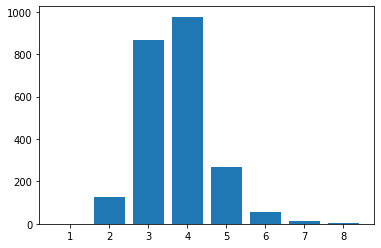

Hardest word(s):  ['hatch', 'wound', 'shade', 'catty', 'fight']
8 rounds 
RANDOM 0 rounds 4 bacon 1
RANDOM 100 rounds 5 caulk 1
RANDOM 200 rounds 4 risky 1
RANDOM 300 rounds 3 flung 1
RANDOM 400 rounds 4 derby 3
RANDOM 500 rounds 3 paint 2
RANDOM 600 rounds 3 lover 2
RANDOM 700 rounds 4 rajah 1
RANDOM 800 rounds 4 nudge 1
RANDOM 900 rounds 3 blunt 1
RANDOM 1000 rounds 4 offer 1
RANDOM 1100 rounds 4 dairy 2
RANDOM 1200 rounds 3 curse 3
RANDOM 1300 rounds 4 human 1
RANDOM 1400 rounds 8 wight 1
RANDOM 1500 rounds 4 juicy 2
RANDOM 1600 rounds 3 write 2
RANDOM 1700 rounds 4 lyric 3
RANDOM 1800 rounds 3 trope 1
RANDOM 1900 rounds 3 tutor 1
RANDOM 2000 rounds 3 plait 2
RANDOM 2100 rounds 4 hymen 1
RANDOM 2200 rounds 3 sleek 5
RANDOM 2300 rounds 4 frond 1
RANDOM AVERAGE: 3.929157667386609 +/- 0.041750220192787596


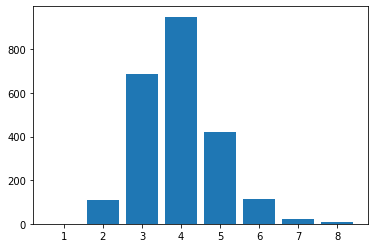

Hardest word(s):  ['rower', 'catch', 'wight', 'gazer', 'round', 'might', 'savvy', 'fight']
8 rounds 
COMMON 0 rounds 2 bacon 35
COMMON 100 rounds 3 caulk 10
COMMON 200 rounds 3 risky 3
COMMON 300 rounds 4 flung 2
COMMON 400 rounds 3 derby 1
COMMON 500 rounds 3 paint 2
COMMON 600 rounds 4 lover 8
COMMON 700 rounds 4 rajah 1
COMMON 800 rounds 3 nudge 2
COMMON 900 rounds 5 blunt 1
COMMON 1000 rounds 4 offer 1
COMMON 1100 rounds 4 dairy 3
COMMON 1200 rounds 4 curse 1
COMMON 1300 rounds 4 human 1
COMMON 1400 rounds 6 wight 3
COMMON 1500 rounds 5 juicy 1
COMMON 1600 rounds 3 write 1
COMMON 1700 rounds 4 lyric 1
COMMON 1800 rounds 5 trope 1
COMMON 1900 rounds 4 tutor 1
COMMON 2000 rounds 3 plait 2
COMMON 2100 rounds 4 hymen 1
COMMON 2200 rounds 4 sleek 1
COMMON 2300 rounds 4 frond 1
COMMON AVERAGE: 3.8673866090712745 +/- 0.041927849373640046


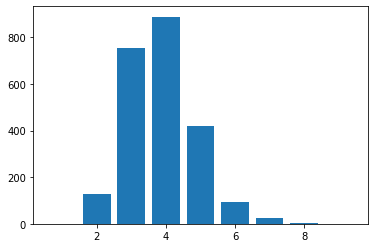

Hardest word(s):  ['shade']
9 rounds 


In [15]:
PROD_TARGET = ""
PROD_STRATEGY = ""

for name, strategy_fn in strategy_dict.items():
  if PROD_STRATEGY and name != PROD_STRATEGY:
    continue

  results = []
  for i, target in enumerate(ALL_CANDIDATES):
    if PROD_TARGET and target != PROD_TARGET:
      continue

    word_df = pd.DataFrame(ALL_CANDIDATES, columns=["words"])
    candidate_df = pd.DataFrame(word_df["words"].map(list).to_list())
    counter = 0
    while True:
      word = strategy_fn(word_df.words.tolist(), counter == 0)
      counter += 1
      assert target in word_df.words.tolist(), f"{target} {word_df.words.tolist()}"
      result = evaluate(word, target)
      if result == (2,2,2,2,2):
        results.append([target, counter])
        break

      candidate_df = prune_wordle_candidates(candidate_df, word, result)
      word_df = word_df.loc[candidate_df.index]
      #print(f"{name} {i} rounds {counter} {word} {target} {len(candidate_df)}")
    
    if i % 100 == 0:
      print(f"{name} {i} rounds {counter} {target} {len(candidate_df)}")
  results_df = pd.DataFrame(results, columns=["target", "rounds"])
  print(f"{name} AVERAGE: {results_df.rounds.mean()} +/- {2 * results_df.rounds.sem()}")
  counts_df = results_df.groupby("rounds").count().reset_index()
  plt.bar(counts_df["rounds"], counts_df["target"])
  plt.show()
  print("Hardest word(s): ", results_df.loc[results_df.rounds == results_df.rounds.max(), "target"].tolist())
  print(f"{results_df.rounds.max()} rounds ")

# Solver Program

In [ ]:
PROD_STRATEGY = "PROBABILISTIC"

strategy_fn = strategy_dict[PROD_STRATEGY]
word_df = pd.DataFrame(ALL_CANDIDATES, columns=["words"])
candidate_df = pd.DataFrame(word_df["words"].map(list).to_list())
counter = 0
while True:
  if len(word_df) == 0:
      print("Something went wrong, there are no candidates left...")
      print("Aborting...")
      break

  candidate = strategy_fn(word_df.words.tolist(), counter == 0)
  counter += 1
  print(
      f"\nCandidates remaining = {len(word_df)}"
      f"\nBest Candidate: {candidate}")

  # parse chosen word from user
  is_valid_word = False
  while not is_valid_word:
    word = input(f"\nEnter your chosen five-letter word (i.e. {candidate}): ")
    is_valid_word = (len(word) == 5)
    if not is_valid_word:
      print("Improper Input!")

  # parse chosen result from user
  is_valid_result = False
  while not is_valid_result:
    result = input(
        "\n0 = Miss, 1 = Partial Match, 2 = Perfect Match "
        "\nEnter your result as a comma-separated list "
        "(i.e. 0,0,0,1,2): ")
    result = tuple(map(int, "".join(result.split()).split(",")))
    is_valid_result = (len(result) == 5) and all([i >= 0 and i <= 2 for i in result])
    if not is_valid_result:
      print("Improper Input!")

  # you won wordle
  if all([i == 2 for i in result]):
    print(f"Congrats! The word was {word}")
    break

  candidate_df = prune_wordle_candidates(candidate_df, word, result)
  word_df = word_df.loc[candidate_df.index]


Candidates remaining = 4072
Best Candidate: cares

Enter your chosen five-letter word (i.e. cares): cares

0 = Miss, 1 = Partial Match, 2 = Perfect Match 
Enter your result as a comma-separated list (i.e. 0,0,0,1,2): 1,2,0,0,0

Candidates remaining = 26
Best Candidate: match

Enter your chosen five-letter word (i.e. match): match

0 = Miss, 1 = Partial Match, 2 = Perfect Match 
Enter your result as a comma-separated list (i.e. 0,0,0,1,2): 0,2,0,1,0

Candidates remaining = 5
Best Candidate: jacky

Enter your chosen five-letter word (i.e. jacky): jacky

0 = Miss, 1 = Partial Match, 2 = Perfect Match 
Enter your result as a comma-separated list (i.e. 0,0,0,1,2): 0,2,1,0,0

Candidates remaining = 1
Best Candidate: panic

Enter your chosen five-letter word (i.e. panic): panic

0 = Miss, 1 = Partial Match, 2 = Perfect Match 
Enter your result as a comma-separated list (i.e. 0,0,0,1,2): 2,2,2,2,2
Congrats! The word was panic
